# Chi

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### [scipy.stats.chi](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi.html#scipy.stats.chi)

In [2]:
from scipy.stats import chi

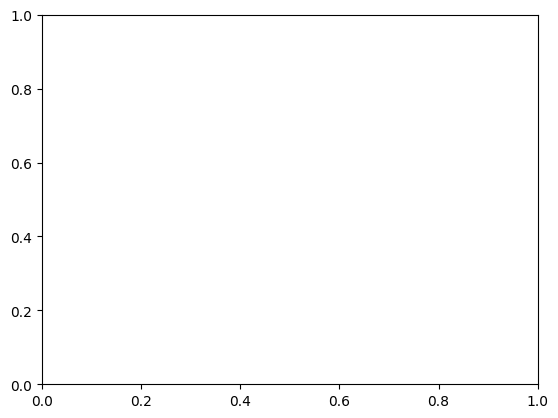

In [3]:
fig, ax = plt.subplots(1, 1)

In [4]:
df = 78
mean, var, skew, kurt = chi.stats(df, moments='mvsk')

In [5]:
x = np.linspace(chi.ppf(0.01, df),
                chi.ppf(0.99, df), 100)
ax.plot(x, chi.pdf(x, df),
       'r-', lw=5, alpha=0.6, label='chi pdf')

In [6]:
rv = chi(df)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

In [7]:
vals = chi.ppf([0.001, 0.5, 0.999], df)
np.allclose([0.001, 0.5, 0.999], chi.cdf(vals, df))

True

In [8]:
r = chi.rvs(df, size=1000)

In [9]:
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

## [scipy.stats.chi2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html#scipy.stats.chi2)

In [10]:
from scipy.stats import chi2

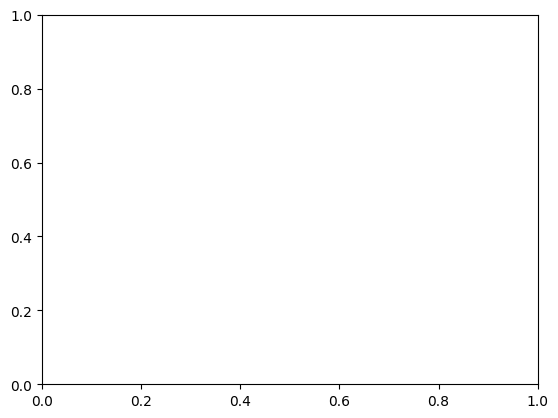

In [11]:
fig, ax = plt.subplots(1, 1)

In [12]:
df = 55
mean, var, skew, kurt = chi2.stats(df, moments='mvsk')

In [13]:
x = np.linspace(chi2.ppf(0.01, df),
                chi2.ppf(0.99, df), 100)
ax.plot(x, chi2.pdf(x, df),
       'r-', lw=5, alpha=0.6, label='chi2 pdf')

In [14]:
rv = chi2(df)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

In [15]:
vals = chi2.ppf([0.001, 0.5, 0.999], df)
np.allclose([0.001, 0.5, 0.999], chi2.cdf(vals, df))

True

In [16]:
r = chi2.rvs(df, size=1000)

In [17]:
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

## [scipy.stats.chisquare](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html#scipy.stats.chisquare)

In, bird foraging behavior was investigated in an old-growth forest of Oregon. In the forest, 44% of the canopy volume was Douglas fir, 24% was ponderosa pine, 29% was grand fir, and 3% was western larch. The authors observed the behavior of several species of birds, one of which was the red-breasted nuthatch. They made 189 observations of this species foraging, recording 43 (“23%”) of observations in Douglas fir, 52 (“28%”) in ponderosa pine, 54 (“29%”) in grand fir, and 40 (“21%”) in western larch.

Using a chi-square test, we can test the null hypothesis that the proportions of foraging events are equal to the proportions of canopy volume. The authors of the paper considered a p-value less than 1% to be significant.

Using the above proportions of canopy volume and observed events, we can infer expected frequencies.

In [18]:
from scipy.stats import chisquare

In [19]:
f_exp = np.array([44, 24, 29, 3]) / 100 * 189
f_obs = np.array([43, 52, 54, 40])

In [20]:
chisquare(f_obs=f_obs, f_exp=f_exp)

Power_divergenceResult(statistic=228.23515947653874, pvalue=3.3295585338846486e-49)

In [21]:
chisquare([16, 18, 16, 14, 12, 12])

Power_divergenceResult(statistic=2.0, pvalue=0.8491450360846096)

In [22]:
chisquare([16, 18, 16, 14, 12, 12], f_exp=[16, 16, 16, 16, 16, 8])

Power_divergenceResult(statistic=3.5, pvalue=0.6233876277495822)

In [23]:
obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
obs.shape

(6, 2)

In [24]:
chisquare(obs)

Power_divergenceResult(statistic=array([2.        , 6.66666667]), pvalue=array([0.84914504, 0.24663415]))

In [25]:
chisquare(obs, axis=None)

Power_divergenceResult(statistic=23.31034482758621, pvalue=0.015975692534127565)

In [26]:
chisquare(obs.ravel())

Power_divergenceResult(statistic=23.310344827586206, pvalue=0.01597569253412758)

In [27]:
chisquare([16, 18, 16, 14, 12, 12], ddof=1)

Power_divergenceResult(statistic=2.0, pvalue=0.7357588823428847)

In [28]:
chisquare([16, 18, 16, 14, 12, 12], ddof=[0,1,2])

Power_divergenceResult(statistic=2.0, pvalue=array([0.84914504, 0.73575888, 0.5724067 ]))

In [29]:
chisquare([16, 18, 16, 14, 12, 12],
          f_exp=[[16, 16, 16, 16, 16, 8], [8, 20, 20, 16, 12, 12]],
          axis=1)

Power_divergenceResult(statistic=array([3.5 , 9.25]), pvalue=array([0.62338763, 0.09949846]))

## [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html#scipy.stats.chi2_contingency)

In [30]:
from scipy.stats import chi2_contingency

In [31]:
table = np.array([[176, 230], [21035, 21018]])
res = chi2_contingency(table)
res.statistic

6.892569132546561

In [32]:
res.pvalue

0.008655478161175739

In [33]:
obs = np.array([[10, 10, 20], [20, 20, 20]])
res = chi2_contingency(obs)
res.statistic

2.7777777777777777

In [34]:
res.pvalue

0.24935220877729622

In [35]:
res.dof

2

In [36]:
res.expected_freq

array([[12., 12., 16.],
       [18., 18., 24.]])

In [37]:
res = chi2_contingency(obs, lambda_="log-likelihood")
res.statistic

2.768858761678132

In [38]:
res.pvalue

0.25046668010954165

In [39]:
obs = np.array(
    [[[[12, 17],
       [11, 16]],
      [[11, 12],
       [15, 16]]],
     [[[23, 15],
       [30, 22]],
      [[14, 17],
       [15, 16]]]])
res = chi2_contingency(obs)
res.statistic

8.75845144267419

In [40]:
res.pvalue

0.6441772502929553